In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 23.5MB/s]
100% 163M/163M [00:08<00:00, 19.8MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1450.jpg', 'with_mask_22.jpg', 'with_mask_3609.jpg', 'with_mask_2824.jpg', 'with_mask_270.jpg']
['with_mask_1936.jpg', 'with_mask_1130.jpg', 'with_mask_2017.jpg', 'with_mask_2131.jpg', 'with_mask_2482.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2339.jpg', 'without_mask_3144.jpg', 'without_mask_1646.jpg', 'without_mask_3607.jpg', 'without_mask_3476.jpg']
['without_mask_3423.jpg', 'without_mask_1875.jpg', 'without_mask_1555.jpg', 'without_mask_2822.jpg', 'without_mask_272.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


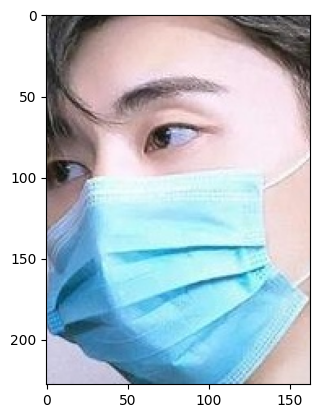

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

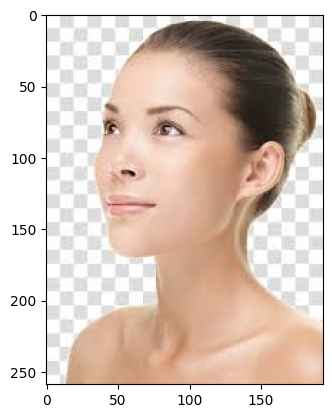

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[178, 192, 171],
        [167, 182, 155],
        [165, 180, 145],
        ...,
        [ 72,  74,  57],
        [ 65,  67,  49],
        [ 49,  51,  32]],

       [[182, 192, 178],
        [169, 180, 162],
        [152, 164, 141],
        ...,
        [ 77,  86,  55],
        [ 62,  71,  41],
        [ 77,  86,  57]],

       [[160, 170, 163],
        [181, 192, 185],
        [163, 176, 169],
        ...,
        [108, 118,  94],
        [156, 166, 143],
        [122, 131, 111]],

       ...,

       [[ 31,  72,  94],
        [ 28,  70,  92],
        [ 31,  72,  94],
        ...,
        [214, 184, 173],
        [209, 183, 173],
        [204, 181, 174]],

       [[ 29,  74,  97],
        [ 31,  75,  98],
        [ 32,  75,  99],
        ...,
        [200, 184, 174],
        [197, 183, 178],
        [185, 174, 174]],

       [[ 30,  78, 100],
        [ 30,  76, 100],
        [ 27,  71,  96],
        ...,
        [208, 198, 193],
        [190, 184, 184],
        [173, 170, 176]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[159, 126, 109],
        [160, 127, 110],
        [160, 128, 110],
        ...,
        [137, 150, 164],
        [137, 151, 163],
        [138, 150, 162]],

       [[158, 125, 108],
        [159, 126, 109],
        [160, 127, 110],
        ...,
        [137, 149, 162],
        [137, 149, 162],
        [137, 149, 161]],

       [[158, 125, 108],
        [159, 126, 109],
        [160, 127, 110],
        ...,
        [137, 149, 161],
        [137, 149, 161],
        [137, 149, 161]]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.62352941, 0.49411765, 0.42745098],
        [0.62745098, 0.49803922, 0.43137255],
        [0.62745098, 0

Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 24ms/step - loss: 0.4542 - acc: 0.8115 - val_loss: 0.2845 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2794 - acc: 0.8906 - val_loss: 0.2395 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2449 - acc: 0.9016 - val_loss: 0.2512 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2169 - acc: 0.9143 - val_loss: 0.2080 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1822 - acc: 0.9303 - val_loss: 0.2145 - val_acc: 0.9190


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.2145 - acc: 0.9126
Test Accuracy = 0.9126406311988831


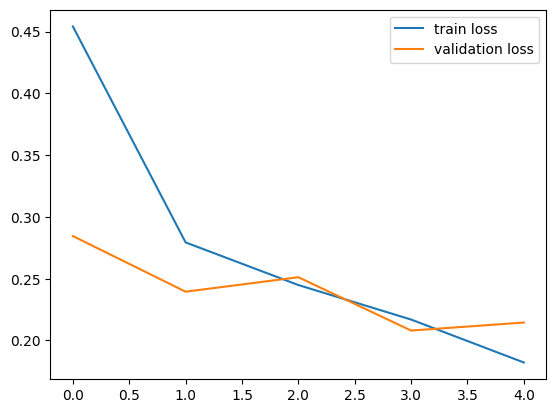

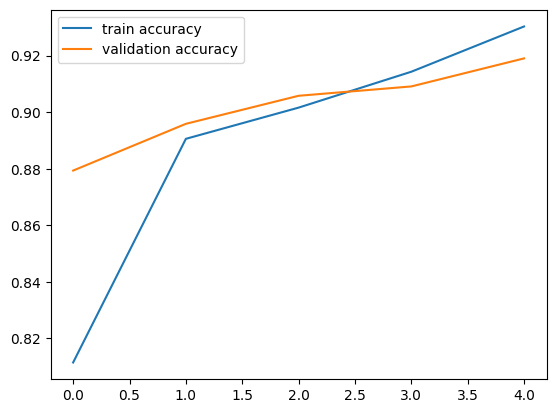

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/pic1.jpeg


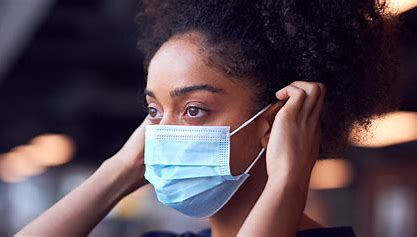

1/1 [==============================] - 0s 348ms/step
[[0.13853095 0.8264064 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/pic2.jpg


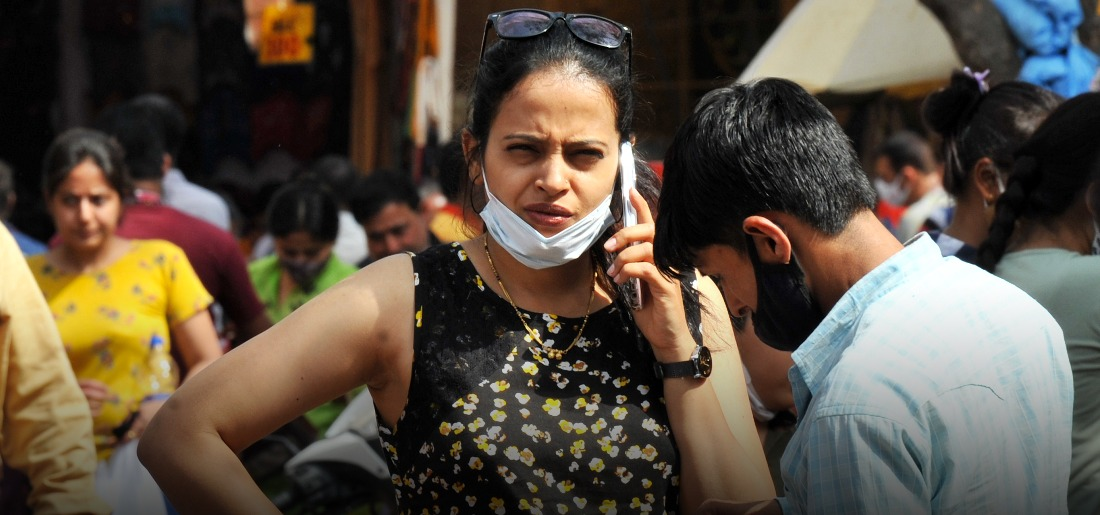

1/1 [==============================] - 0s 28ms/step
[[0.09753799 0.86635566]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')